In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [43]:
N = 10001
nbins = 30

data_1 = np.random.randn(N) - 1
data_2 = np.random.normal(0, 3, N)
data_3 = np.random.randn(N) + 1

y_1, x_1 = np.histogram(data_1, nbins)
x_1 = (x_1[:-1] + x_1[1:]) / 2

y_2, x_2 = np.histogram(data_2, nbins)
x_2 = (x_2[:-1] + x_2[1:]) / 2

y_3, x_3 = np.histogram(data_3, nbins)
x_3 = (x_3[:-1] + x_3[1:]) / 2

In [44]:
mean_val = 10.2
std_val = 7.5
num_samp = 123

#both generate values from the same distribution
#np.random.normal(mean_val, std_val, num_samp)
#np.random.randn(num_samp) * std_val + mean_val

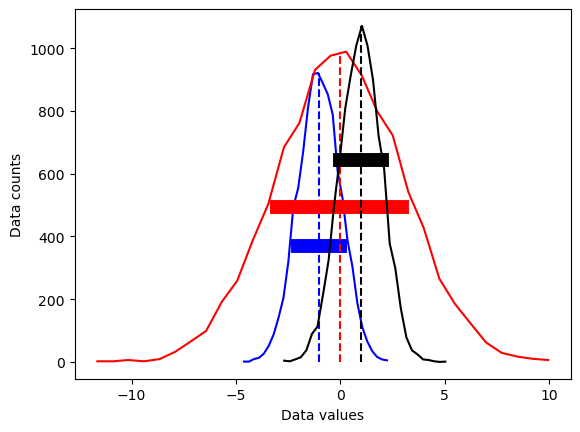

In [46]:
stds = np.zeros(3)
means = np.zeros(3)

stds[0] = np.std(data_1, ddof=1)
stds[1] = np.std(data_2, ddof=1)
stds[2] = np.std(data_3, ddof=1)

means[0] = np.mean(data_1)
means[1] = np.mean(data_2)
means[2] = np.mean(data_3)

plt.plot(x_1, y_1, 'b')
plt.plot([means[0] - stds[0], means[0] + std[0]], [0.4 * np.max(y_1), 0.4 * np.max(y_1)], 'b', linewidth=10)
plt.plot([means[0], means[0]], [0, np.max(y_1)], '--b')

plt.plot(x_2, y_2, 'r')
plt.plot([means[1] - stds[1], means[1] + std[1]], [0.5 * np.max(y_2), 0.5 * np.max(y_2)], 'r', linewidth=10)
plt.plot([means[1], means[1]], [0, np.max(y_2)], '--r')

plt.plot(x_3, y_3, 'k')
plt.plot([means[2] - stds[2], means[2] + std[2]], [0.6 * np.max(y_3), 0.6 * np.max(y_3)], 'k', linewidth=10)
plt.plot([means[2], means[2]], [0, np.max(y_3)], '--k')

plt.xlabel('Data values')
plt.ylabel('Data counts')

plt.show()

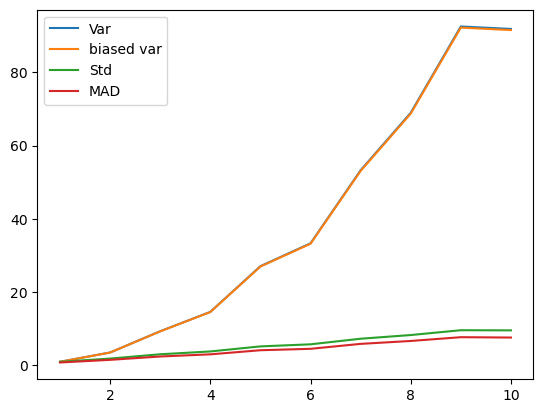

In [87]:
variances = np.arange(1, 11)
N = 300

var_measures = np.zeros((4, len(variances)))

for i in range(len(variances)):
    data = np.random.randn(N) * variances[i]
    data_central = data - np.mean(data)
    
    var_measures[0, i] = np.sum(data_central ** 2) / (N - 1)
    var_measures[1, i] = np.sum(data_central ** 2) / N
    var_measures[2, i] = np.sqrt(np.sum(data_central ** 2) / (N - 1))
    var_measures[3, i] = np.sum(np.abs(data_central) / (N - 1))
    
plt.plot(variances, var_measures.T)
plt.legend(['Var', 'biased var', 'Std', 'MAD'])

plt.show()

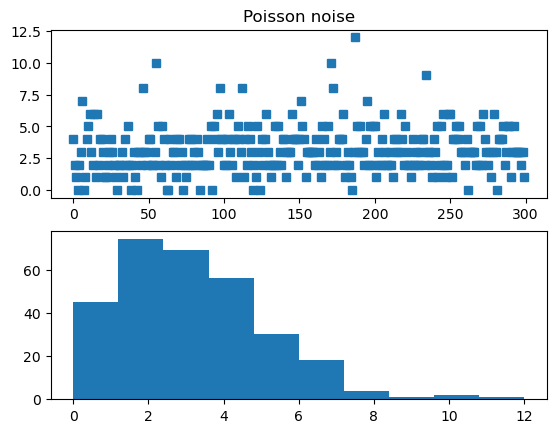

In [137]:
data = np.random.poisson(3, 300)

fig, ax = plt.subplots(2, 1)

ax[0].plot(data, 's')
ax[0].set_title('Poisson noise')

ax[1].hist(data)

plt.show()

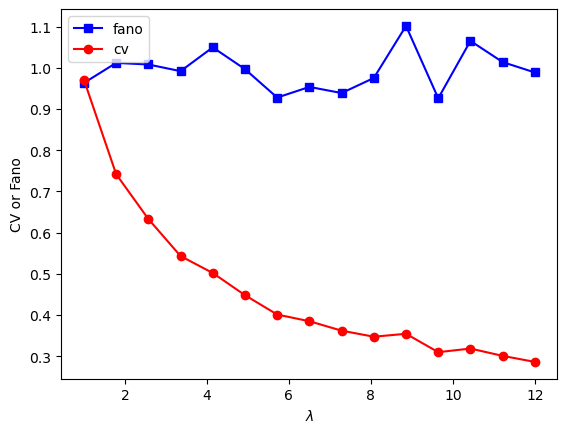

In [166]:
lambdas = np.linspace(1, 12, 15)

fano = np.zeros(len(lambdas))
cv = np.zeros(len(lambdas))

for i in range(len(lambdas)):
    data = np.random.poisson(lambdas[i], 1000)
    
    fano[i] = np.var(data, ddof=1) / np.mean(data)
    cv[i] = np.std(data, ddof=1) / np.mean(data)
    
plt.plot(lambdas, fano, 'bs-')
plt.plot(lambdas, cv, 'ro-')

plt.legend(['fano', 'cv'])
plt.xlabel('$\lambda$')
plt.ylabel('CV or Fano')

plt.show()